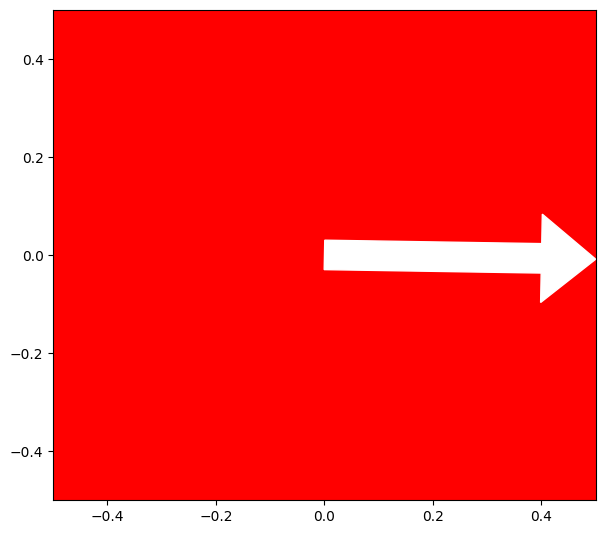

In [17]:
# Лабораторная работа №3

import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import animation

fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(7, 6.5)

ax = plt.axes(xlim=(-0.5, 0.5), ylim=(-0.5, 0.5))

width = 1
height = 1
patch_rect = mpatches.Rectangle([-0.5, -0.5], width, height, ec="none")
patch_rect.set_color('red')
patch_arrow = mpatches.Arrow(0, 0, 0.5, 0, width=0.3)

def init():
    ax.add_patch(patch_rect)
    ax.add_patch(patch_arrow)

    return patch_arrow,

def animate(i):
    sin = np.sin(np.radians(i))
    cos = np.cos(np.radians(i))
    dx = 0
    dy = 0

    if width * abs(sin) < height * abs(cos):
        dx = np.copysign(width / 2, cos)
        dy = (sin / cos) * dx
    else:
        dy = np.copysign(height / 2, sin)
        dx = (cos / sin) * dy

    ax.patches.pop(1)
    new_arrow = mpatches.Arrow(0, 0, dx, dy, width=0.3)
    new_arrow.set_color('white')
    ax.add_patch(new_arrow)
    return new_arrow,

anim = animation.FuncAnimation(fig, animate,
                               init_func=init,
                               frames=360,
                               interval=20,
                               repeat=False)

Writer = animation.writers['pillow']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

anim.save('animation.gif', writer=writer)

plt.show()